# Centroid initialization using edt

In [6]:
!python c_setup.py build_ext --inplace
import sys
print(sys.path)
from frmodel.base.kdclusterer.kanungo_utils import *
from frmodel.base.kdclusterer.kdnode import KDNode
from frmodel.base.kdclusterer.candidate import Candidate
from frmodel.base.D2.frame2D import Frame2D
import numpy as np
from sklearn.preprocessing import StandardScaler
from PIL import Image
import seaborn as sb
sb.set()
import pandas as pd
import gdal

# TODO: permute features
bands_str = ["red", "green", "blue", "rededge", "NIR"]
bands = []

for band_str in bands_str:
    band_ds: gdal.Dataset = gdal.Open(sys.path[0] + f"/testimgs/{band_str}.tif")
    band: gdal.Band = band_ds.GetRasterBand(1)
    bands.append(band.ReadAsArray())
for band in bands:
    print(band.shape)
bands_ar = np.moveaxis(np.stack(bands), 0, -1)
print(f"bands_ar.shape: {bands_ar.shape}")
ratio = bands_ar.shape[1] / bands_ar.shape[0] # width / height
print(ratio)

'''Filter out pixels that are all nans'''
notnan_pos = np.nonzero(np.all(np.isnan(bands_ar), axis=2) == False)
# Returns a tuple of arrays, one for each dimension of a, containing the indices of the non-zero elements in that dimension.
# Thus, nonnan_pos is  he row_idx, col_idx of pixels that are not [nan nan nan] 
bands_ar = bands_ar[notnan_pos[0], notnan_pos[1], :]
print("Shape of notnan bands_ar: ", bands_ar.shape)

'''
# There STILL are nans (e.g. [nan, nan, 700]) in the pixels at this step, just that the pixel cannot be [R G B] = [nan nan nan]
for pixel in bands_ar:
    if True in np.isnan(pixel):
        print(pixel)
        break
# Thus, if we construct_kdtree() with the bands_ar and filter() the Candidates according to the kdtree now, we will get an error,
# since the filtering algorithm relies on the calculation of distance between the cell's actual_cent and each Candidate's cand_pos, 
# and we would have nan actual_cent.
# We need a way to deal with nans. Should we replace with zero?
'''
np.nan_to_num(bands_ar, copy=False, nan=0.0)

# TODO GLCM

'''Concat the x y coordinates of each point'''
concat_x = np.expand_dims(notnan_pos[1], axis = 1) # height, width is y,x rather than x, y
concat_y = np.expand_dims(np.flip(notnan_pos[0]), axis = 1)
bands_ar = np.concatenate([concat_x, concat_y, bands_ar], axis=1)

print("Shape of bands_ar: ", bands_ar)


Traceback (most recent call last):
  File "/Users/phoebezhouhuixin/FRModel/c_setup.py", line 8, in <module>
    annotate=True),
  File "/opt/anaconda3/lib/python3.7/site-packages/Cython/Build/Dependencies.py", line 972, in cythonize
    aliases=aliases)
  File "/opt/anaconda3/lib/python3.7/site-packages/Cython/Build/Dependencies.py", line 815, in create_extension_list
    for file in nonempty(sorted(extended_iglob(filepattern)), "'%s' doesn't match any files" % filepattern):
  File "/opt/anaconda3/lib/python3.7/site-packages/Cython/Build/Dependencies.py", line 114, in nonempty
    raise ValueError(error_msg)
ValueError: 'src/**/*.pyx' doesn't match any files
['/Users/phoebezhouhuixin/FRModel/tests/base/kdclusterer', '/Users/phoebezhouhuixin/FRModel', '/Users/phoebezhouhuixin/FRModel/cython-build/src', '/Users/phoebezhouhuixin/FRModel/src', '/Users/phoebezhouhuixin/FRModel/tests/base/kdclusterer', '/opt/anaconda3/lib/python37.zip', '/opt/anaconda3/lib/python3.7', '/opt/anaconda3/lib/pyt

ModuleNotFoundError: No module named 'frmodel.base.D2.frame._cy_corr'

In [ ]:
Frame2D.create(bands_ar, labels=[Frame2D.CHN.RED, Frame2D.CHN.GREEN, Frame2D.CHN.BLUE, Frame2D.CHN.RED_EDGE, Frame2D.CHN.NIR])

'''Apply standard normalization to each point's features'''
scaler = StandardScaler()
bands_ar = scaler.fit_transform(bands_ar)



'''Sample just a few points'''
bands_ar = bands_ar[np.random.choice(np.arange(0, len(bands_ar)), 40000)]  # 10000 points
# TODO: use more points, but without printing, can log instead
print(bands_ar.shape)
print()
print(bands_ar[0])

# Load original data

In [138]:
import numpy as np
from PIL import Image
import sys
import gdal

bands_str = ["red", "green", "blue"]
bands = []

for band_str in bands_str:
    band_ds: gdal.Dataset = gdal.Open(sys.path[0] + f"/testimgs/{band_str}.tif")
    band: gdal.Band = band_ds.GetRasterBand(1)
    bands.append(band.ReadAsArray())

bands_ar = np.moveaxis(np.stack(bands), 0, -1)
print(f"bands_ar.shape: {bands_ar.shape}")

bands_ar.shape: (7620, 4876, 3)


In [139]:
# from matplotlib import pyplot as plt
# plt.imshow(bands_ar)

In [140]:
bands_ar

array([[[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       ...,

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]

In [141]:
np.all(np.all(np.all(np.isnan(bands_ar), axis = 2), axis = 1), axis = 0) # False; not all pixels are nan

False

In [142]:
notnan_pos = np.nonzero(np.all(np.isnan(bands_ar), axis = 2) == False) # row_idx, col_idx of pixels that are not [nan nan nan]
# Returns a tuple of arrays, one for each dimension of a, containing the indices of the non-zero elements in that dimension. 

In [143]:
notnan_pos

(array([ 256,  257,  257, ..., 7360, 7361, 7361]),
 array([3394, 3390, 3391, ..., 3645, 3643, 3644]))

In [144]:
notnan_pos[0].shape, notnan_pos[1].shape

((21566234,), (21566234,))

In [145]:
bands_ar[258, 3932, :]

array([nan, nan, nan], dtype=float32)

In [146]:
height = bands_ar.shape[0]
width = bands_ar.shape[1]
height*width

37155120

# Filter out pixels that are all nans

In [147]:
bands_ar = bands_ar[notnan_pos[0], notnan_pos[1], :]
bands_ar.shape

(21566234, 3)

# Replace remaining nans with zero

In [148]:
np.nan_to_num(bands_ar, copy=False, nan=0.0)
bands_ar

array([[265.96863, 782.7878 , 301.75485],
       [  0.     ,   0.     , 712.8713 ],
       [  0.     ,   0.     , 595.1271 ],
       ...,
       [421.2369 , 880.49316, 337.1134 ],
       [  0.     ,   0.     , 342.84607],
       [403.1642 , 828.39514, 342.205  ]], dtype=float32)

# Normalize, then concatenate the x and y pos

In [149]:
bands_ar.shape

(21566234, 3)

In [181]:
np.mean(bands_ar, axis = 0)

array([ 546.4201 , 1210.4811 ,  432.75757], dtype=float32)

In [182]:
np.std(bands_ar, axis = 0)

array([384.4656 , 761.7153 , 232.22961], dtype=float32)

In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit_transform(bands_ar))

[[-0.7352151  -0.5686466  -0.5969031 ]
 [-1.4107751  -1.5755187   1.1275375 ]
 [-1.4107751  -1.5755187   0.6336558 ]
 ...
 [-0.3408338  -0.44297165 -0.44859052]
 [-1.4107751  -1.5755187  -0.4245447 ]
 [-0.38673842 -0.5099835  -0.42723373]]


In [151]:
z = scaler.fit_transform(bands_ar)
np.max(z), np.min(z), np.mean(z), np.std(z)

(21.648407, -1.6846889, -1.890958e-07, 0.99999994)

In [157]:
notnan_pos

(array([ 256,  257,  257, ..., 7360, 7361, 7361]),
 array([3394, 3390, 3391, ..., 3645, 3643, 3644]))

In [173]:
concat_x = np.expand_dims(notnan_pos[1], axis = 1) # height, width is y,x rather than x, y
concat_y = np.expand_dims(notnan_pos[0], axis = 1)

In [174]:
concat_x.shape

(21566234, 1)

In [176]:
np.concatenate([concat_x, concat_y, z], axis=1)

array([[ 2.56000000e+02,  3.39400000e+03, -7.35215127e-01,
        -5.68646610e-01, -5.96903086e-01],
       [ 2.57000000e+02,  3.39000000e+03, -1.41077507e+00,
        -1.57551873e+00,  1.12753749e+00],
       [ 2.57000000e+02,  3.39100000e+03, -1.41077507e+00,
        -1.57551873e+00,  6.33655787e-01],
       ...,
       [ 7.36000000e+03,  3.64500000e+03, -3.40833813e-01,
        -4.42971647e-01, -4.48590517e-01],
       [ 7.36100000e+03,  3.64300000e+03, -1.41077507e+00,
        -1.57551873e+00, -4.24544692e-01],
       [ 7.36100000e+03,  3.64400000e+03, -3.86738420e-01,
        -5.09983480e-01, -4.27233726e-01]])

# Plotting

In [33]:
import pandas as pd
df = pd.DataFrame(columns=["x", "y", "c"]) 
df.loc[0] = [4,5,6]
df

,x,y,c
0,4,5,6


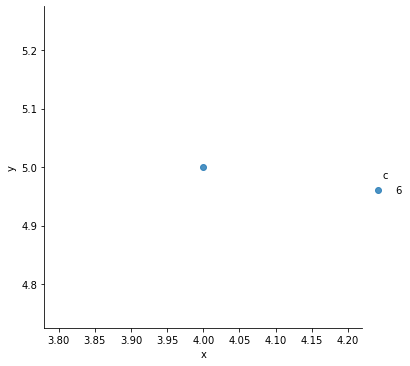

In [34]:
import seaborn as sb
sb.lmplot(x = "x", y = "y", hue = "c", data = df)

# Put in the x y index grid

In [20]:
idx_grid = np.indices(bands_ar.shape[:2])

In [78]:
idx_grid[0].shape

(5458, 5528)

In [79]:
idx_grid

array([[[   0,    0,    0, ...,    0,    0,    0],
        [   1,    1,    1, ...,    1,    1,    1],
        [   2,    2,    2, ...,    2,    2,    2],
        ...,
        [5455, 5455, 5455, ..., 5455, 5455, 5455],
        [5456, 5456, 5456, ..., 5456, 5456, 5456],
        [5457, 5457, 5457, ..., 5457, 5457, 5457]],

       [[   0,    1,    2, ..., 5525, 5526, 5527],
        [   0,    1,    2, ..., 5525, 5526, 5527],
        [   0,    1,    2, ..., 5525, 5526, 5527],
        ...,
        [   0,    1,    2, ..., 5525, 5526, 5527],
        [   0,    1,    2, ..., 5525, 5526, 5527],
        [   0,    1,    2, ..., 5525, 5526, 5527]]])

In [80]:
row_idxs = np.expand_dims(idx_grid[0], axis = 2)

In [81]:
row_idxs.shape

(5458, 5528, 1)

In [82]:
col_idxs = np.expand_dims(idx_grid[1], axis = 2)

In [83]:
np.concatenate([bands_ar, row_idxs, col_idxs], axis = 2)

array([[[      nan,       nan,       nan, 0.000e+00, 0.000e+00],
        [      nan,       nan,       nan, 0.000e+00, 1.000e+00],
        [      nan,       nan,       nan, 0.000e+00, 2.000e+00],
        ...,
        [      nan,       nan,       nan, 0.000e+00, 5.525e+03],
        [      nan,       nan,       nan, 0.000e+00, 5.526e+03],
        [      nan,       nan,       nan, 0.000e+00, 5.527e+03]],

       [[      nan,       nan,       nan, 1.000e+00, 0.000e+00],
        [      nan,       nan,       nan, 1.000e+00, 1.000e+00],
        [      nan,       nan,       nan, 1.000e+00, 2.000e+00],
        ...,
        [      nan,       nan,       nan, 1.000e+00, 5.525e+03],
        [      nan,       nan,       nan, 1.000e+00, 5.526e+03],
        [      nan,       nan,       nan, 1.000e+00, 5.527e+03]],

       [[      nan,       nan,       nan, 2.000e+00, 0.000e+00],
        [      nan,       nan,       nan, 2.000e+00, 1.000e+00],
        [      nan,       nan,       nan, 2.000e+00, 2.000e+

In [84]:
bands_ar = np.concatenate([bands_ar, row_idxs, col_idxs], axis = 2)

In [87]:
bands_ar.shape

(5458, 5528, 5)

In [99]:
[1,2,7,9,3].index(3)

4

In [86]:
bands_ar[notnan_pos[0],notnan_pos[1], :].shape

(13210693, 5)

In [98]:
bands_ar[:, :, [i for i in range(bands_ar.shape[-1]) if i not in [3,4]]].shape

(5458, 5528, 3)

In [91]:
bands_ar[:, :, ~4].shape

(5458, 5528)

In [57]:
 img_arr = []
for p in [[255,0,0], [0,255,0], [0,0,255], [0,0,0]]:
    for i in range(1000):
        img_arr.append(p)

from sklearn.preprocessing import normalize
normalize(img_arr, axis=1, norm='l1')
img_arr = np.array(img_arr).reshape(4000,1,3) # pretend its a 4000x1 image
img_arr.shape

(4000, 1, 3)

In [58]:
idx_grid = np.indices(bands_ar.shape)
row_idxs = np.expand_dims(idx_grid[0], axis = 2)

# deleted

In [44]:
img = []
for p in [[255,0,0], [0,255,0], [0,0,255], [0,0,0]]:
    for i in range(1000):
        img.append(p)

img_arr = np.array(img).reshape(4000,1,3) 
# img = Image.fromarray(img.astype(np.uint8))
img_arr.shape

(4000, 1, 3)

In [46]:
flatdata = img_arr.reshape(-1, img_arr.shape[-1])
print(flatdata.shape)

(4000, 3)


In [47]:
idx_grid = np.indices(img_arr.shape[:2])
row_idxs = np.expand_dims(idx_grid[0], axis = 2)
col_idxs = np.expand_dims(idx_grid[1], axis = 2)
xy_axes = np.concatenate([row_idxs, col_idxs], axis = 2)
print(xy_axes.shape)

(4000, 1, 2)


In [49]:
np.concatenate([flatdata, xy_axes], axis = 1)

array([[ 255,    0,    0,    0,    0],
       [ 255,    0,    0,    1,    0],
       [ 255,    0,    0,    2,    0],
       ...,
       [   0,    0,    0, 3997,    0],
       [   0,    0,    0, 3998,    0],
       [   0,    0,    0, 3999,    0]])